# PCA

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.manifold import TSNE


In [34]:
data_path = 'data/processed/combined_labeled_standardized.csv'
df = pd.read_csv(data_path)
df = df.dropna(axis=1)  # Drop columns with all NaN values

In [35]:
# data centered around the origin: healthy
X = df.drop(['healthy', 'patient_id'], axis=1)
Y = df['healthy']

In [36]:
from sklearn.impute import SimpleImputer

# df = df.dropna()
imputer = SimpleImputer(strategy='constant', fill_value=0)
X_imputed = imputer.fit_transform(X)

In [37]:
X_scaled = StandardScaler().fit_transform(X_imputed)

In [38]:
X = X_imputed

In [39]:
pca_20 = PCA().fit(X)
explained = np.cumsum(pca_20.explained_variance_ratio_)
n_components = np.argmax(explained >= 0.95) + 1

print(f"Number of components for >=95% variance: {n_components}")


Number of components for >=95% variance: 379


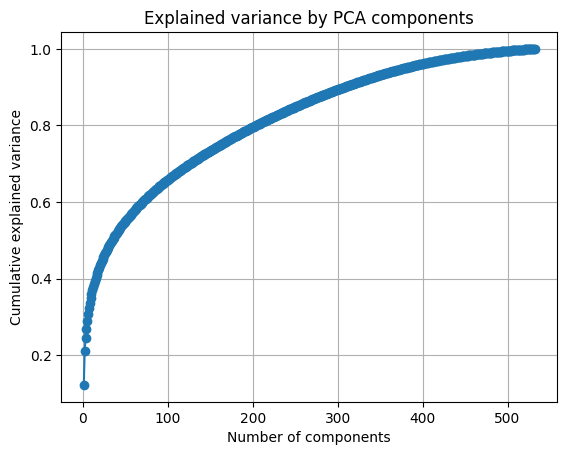

In [40]:
# Visualize explained variance
plt.figure()
plt.plot(np.arange(1, len(explained)+1), explained, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance by PCA components')
plt.grid()
plt.show()

In [41]:
clf = RandomForestClassifier(random_state=42)
scores_no_pca = cross_val_score(clf, X, Y, cv=5)
print(f"Accuracy without PCA: {scores_no_pca.mean():.3f}")

pcaN = PCA(n_components=n_components)
X_pcaN = pcaN.fit_transform(X)
scores_pca = cross_val_score(clf, X_pcaN,Y, cv=5)
print(f"Accuracy with PCA ({n_components} components): {scores_pca.mean():.3f}")

Accuracy without PCA: 1.000
Accuracy with PCA (379 components): 0.793


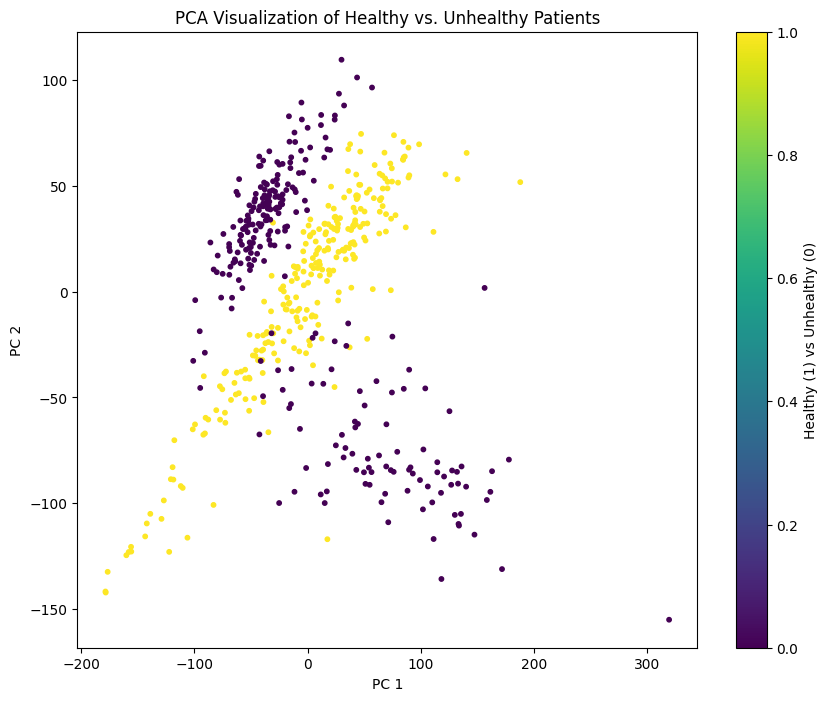

In [42]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pcaN[:, 0], X_pcaN[:, 1], c=Y, cmap='viridis', s=10)
plt.title('PCA Visualization of Healthy vs. Unhealthy Patients')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Healthy (1) vs Unhealthy (0)')
plt.show()

# SVD Single Value Decomposition (Incremental PCA)

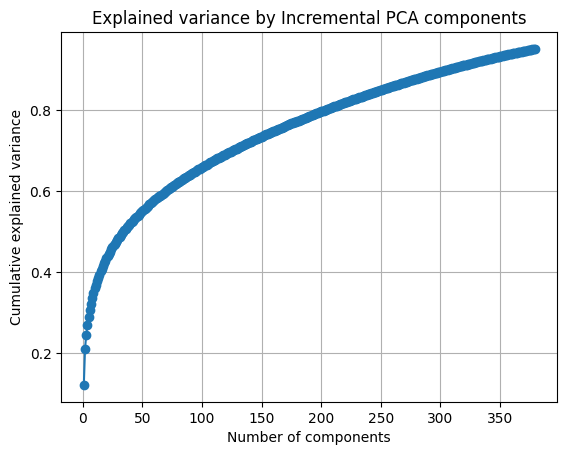

In [43]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=n_components)
X_ipca = ipca.fit_transform(X)

explained_ipca = np.cumsum(ipca.explained_variance_ratio_)
plt.figure()
plt.plot(np.arange(1, len(explained_ipca) + 1), explained_ipca, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance by Incremental PCA components')
plt.grid()
plt.show()

In [44]:
# from sklearn.decomposition import TruncatedSVD
# svd = TruncatedSVD(n_components=221)
# X_svd = svd.fit_transform(X)

# X_svd.shape
# df_svd = pd.DataFrame({'healthy': Y, 'SVD_1': X_svd})

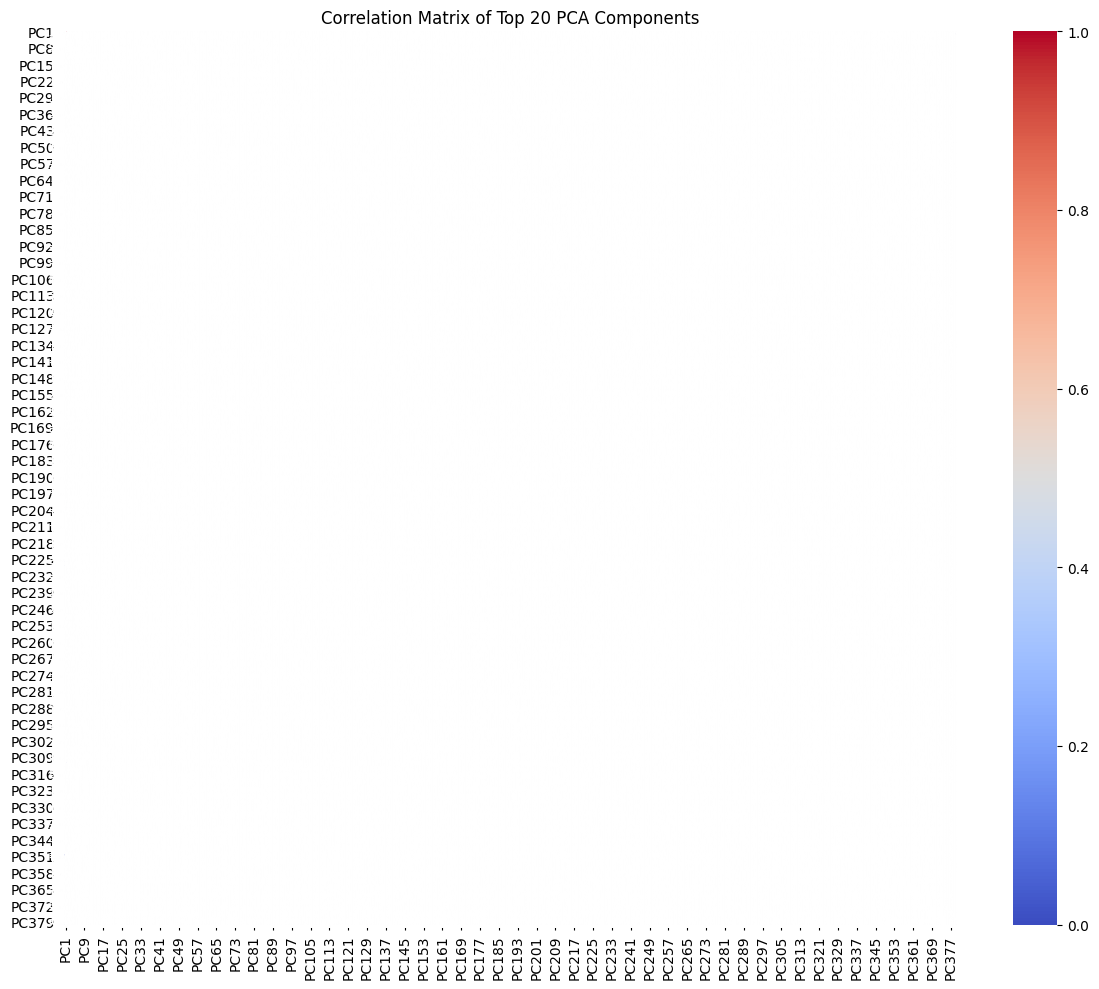

In [45]:
import seaborn as sns

pca_20 = PCA(n_components=n_components)
X_pca_20 = pca_20.fit_transform(X)

df_pca = pd.DataFrame( X_pca_20, columns=[f"PC{i+1}" for i in range(n_components)])

corr_matrix = df_pca.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Top 20 PCA Components")
plt.tight_layout()
plt.show()


# LDA

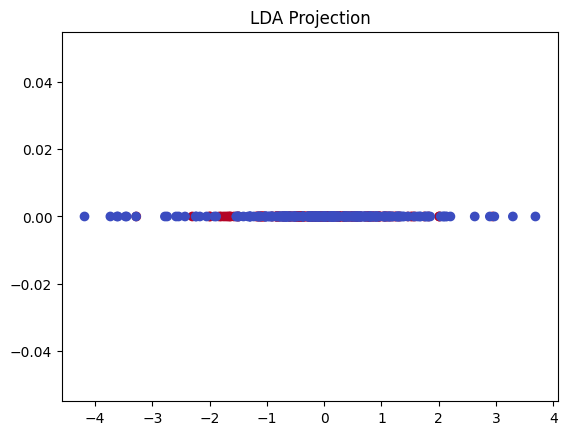

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_imputed, Y)

plt.scatter(X_lda, np.zeros_like(X_lda), c=Y, cmap='coolwarm')
plt.title("LDA Projection")
plt.show()

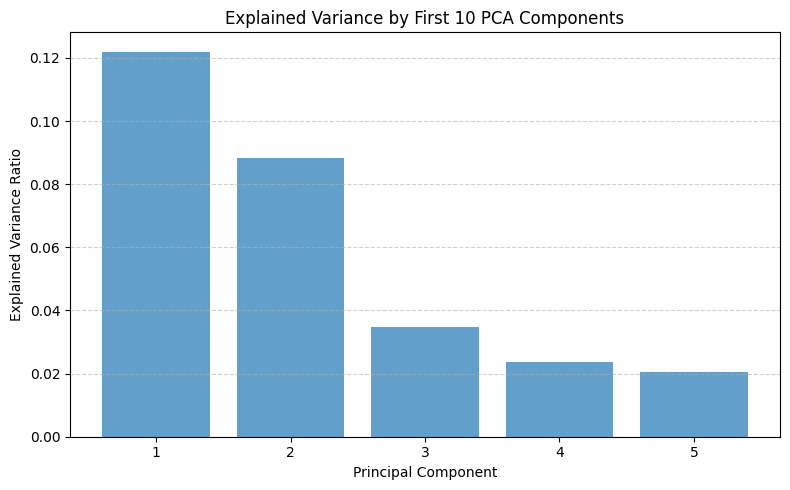

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Get explained variance ratio
explained_var = pcaN.explained_variance_ratio_

# Plot first 10 components
plt.figure(figsize=(8, 5))
plt.bar(range(1, 6), explained_var[:5], alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by First 10 PCA Components')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(np.arange(1, 6))
plt.tight_layout()
plt.show()

# TSNE

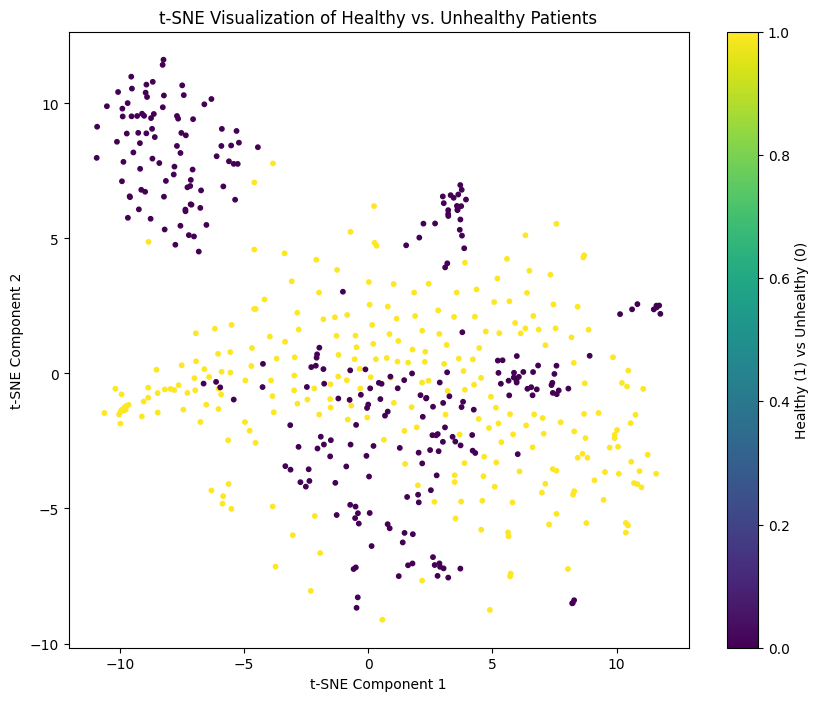

In [48]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y, cmap='viridis', s=10)
plt.title('t-SNE Visualization of Healthy vs. Unhealthy Patients')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Healthy (1) vs Unhealthy (0)')
plt.show()